### 가. 머신러닝 (50점)

In [ ]:
# 문제 : https://www.datamanim.com/dataset/ADPpb/00/27.html
# 풀이 : https://amaruak00.github.io/2022/12/17/adp27th.html

In [ ]:
# Q1. 데이터 확인 및 전처리
# 1.1 결측치를 확인하고, 결측치 제거할 것
# 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것
# 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

# Q2. 군집분석
# 2.1 위에서 생성한 군집들의 특성을 분석할 것
# 2.2 각 군집 별 대표 추천 상품을 도출할 것
# 2.3 CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [1]:
# 1. 신용카드 이상탐지 데이터 [지도학습, 이상탐지]
# 1-1 EDA 데이터 탐색
import pandas as pd
import numpy as np
card = pd.read_csv("C:/adp/data/creditcard.csv")
card = card.drop(["V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"], axis = 1)
# card = card[500:1500]

In [2]:
card1 = card[1000:2500]
card2 = card[card['Class'] == 1]
card3 = pd.concat([card1, card2], axis = 0)

In [3]:
card3.info()
# 결측치가 존재하지 않으며 Class 외에는 float64형식의 변수이며 Class는 이상형변수임

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1000 to 281674
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1992 non-null   float64
 1   V1      1992 non-null   float64
 2   V2      1992 non-null   float64
 3   V3      1992 non-null   float64
 4   V4      1992 non-null   float64
 5   V5      1992 non-null   float64
 6   V6      1992 non-null   float64
 7   V7      1992 non-null   float64
 8   V8      1992 non-null   float64
 9   V9      1992 non-null   float64
 10  V10     1992 non-null   float64
 11  V11     1992 non-null   float64
 12  V12     1992 non-null   float64
 13  V13     1992 non-null   float64
 14  V14     1992 non-null   float64
 15  V15     1992 non-null   float64
 16  V16     1992 non-null   float64
 17  V17     1992 non-null   float64
 18  Amount  1992 non-null   float64
 19  Class   1992 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 326.8 KB


(array([1500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

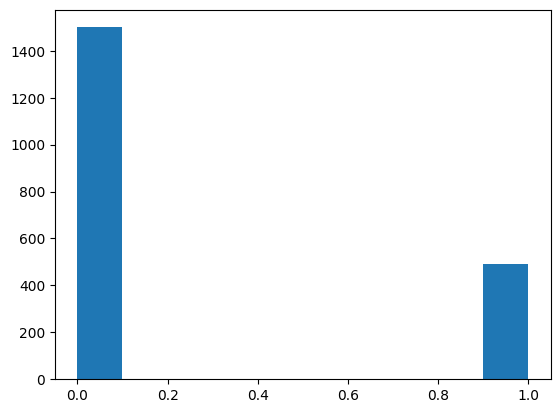

In [43]:
import matplotlib.pyplot as plt
plt.hist(card3['Class'])

In [45]:
card3['Class'].value_counts()
# Class 데이터에 불균형이 있어서 데이터 분석 정확도를 향상하기 위해서 처리가 필요함

0    1500
1     492
Name: Class, dtype: int64

In [48]:
# 1-2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라.
card3.corr()
# Class와 Time, V4, V11, V12, V14, Amount 상관관계가 0.7이상으로 높음
# 변수별로 설명설명하고 Class와 상관관계가 높은 변수들이 많아서 분석 정확도가 다소 높을것으로 기대됨
# 그러나 변수간에도 상관관계가 높은 Case가 많아서 다중공선성이 우려됨
# 예 : V1&V5 0.805160 / V2&V3 -0.814852	/ V2&V7 -0.806965 / V3&V10 0.868611
# 상관관계가 높은 변수들을 전처리해야하나 변수명이 V1, V2로 기입되어 있어서 변수들의 특성을 파악하기가 어려움.
# 차원축소등의 방법을 통해서 다중공선성을 감소하고 분석 정확도를 향상시키는 방법 검토 필요함

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
Time,1.000000,-0.256143,0.308258,-0.474813,0.535310,-0.183985,-0.270221,-0.344694,-0.034956,-0.438494,-0.479029,0.462748,-0.520973,-0.030143,-0.600597,-0.136540,-0.424671,-0.390429,0.077545,0.821607
V1,-0.256143,1.000000,-0.773654,0.849711,-0.562700,0.805160,0.278349,0.835186,-0.067070,0.609044,0.713638,-0.525873,0.604876,-0.047085,0.475018,0.146481,0.637837,0.678927,-0.080089,-0.463474
V2,0.308258,-0.773654,1.000000,-0.814852,0.614764,-0.712609,-0.280256,-0.806965,-0.020537,-0.633145,-0.713307,0.595439,-0.660508,0.025585,-0.574600,-0.149978,-0.622288,-0.642195,-0.241865,0.510234
V3,-0.474813,0.849711,-0.814852,1.000000,-0.760864,0.812977,0.395356,0.867321,-0.166011,0.760679,0.868611,-0.739354,0.810493,-0.094301,0.721125,0.123153,0.751044,0.774219,-0.080450,-0.681338
V4,0.535310,-0.562700,0.614764,-0.760864,1.000000,-0.561688,-0.353338,-0.679696,0.123376,-0.766447,-0.760019,0.726486,-0.820416,0.090949,-0.786075,-0.142897,-0.716123,-0.697875,0.074097,0.725317
V5,-0.183985,0.805160,-0.712609,0.812977,-0.561688,1.000000,0.211523,0.741244,-0.178470,0.618500,0.723606,-0.516079,0.608979,-0.106445,0.449965,0.100043,0.662956,0.715160,-0.267227,-0.409342
V6,-0.270221,0.278349,-0.280256,0.395356,-0.353338,0.211523,1.000000,0.320359,-0.450106,0.346876,0.384778,-0.450484,0.438324,-0.083002,0.453988,-0.029054,0.388777,0.382124,0.285051,-0.386629
V7,-0.344694,0.835186,-0.806965,0.867321,-0.679696,0.741244,0.320359,1.000000,0.059049,0.730983,0.847730,-0.628667,0.730129,-0.027032,0.583733,0.201710,0.753825,0.770929,0.177941,-0.548085
V8,-0.034956,-0.067070,-0.020537,-0.166011,0.123376,-0.178470,-0.450106,0.059049,1.000000,-0.105150,-0.075227,0.153792,-0.171248,0.194216,-0.180879,0.060151,-0.167153,-0.219120,-0.018055,0.078246
V9,-0.438494,0.609044,-0.633145,0.760679,-0.766447,0.618500,0.346876,0.730983,-0.105150,1.000000,0.830269,-0.685369,0.772224,-0.151194,0.661256,0.098414,0.694292,0.743509,-0.030720,-0.604809


In [49]:
## 2.차원축소 관련
## 2-1. 차원축소의 종류와 장/단점
# 차원축소의 방법으로는 설명변수 선택 방법과 주성분분석 방법이 잇음
# 설명변수 선택은 자료를 설명하는데 유요한 몇가지의 설명변수만을 분석가가 임의적으로 선택하여 분석에 사용하는 방법이다. 가장 간단하고 해석이 쉬운 방법으로 유용하지 않거나 상관관계가 높은 컬럼은 제거한다.
# 장점 : 선택한 설명변수의 해석이 용이하고 수행 과정이 간단함
# 단점 : 설명변수 간의 고차원적인 상관관계를 고려하기 어려움

# 주성분분석은 차원 축소에서 가장 많이 사용되는 차원 추출의 방법이다. 차원 추출은 기존의 컬럼을 새롭게 해석하여 저차원의 초평명에 투영하는 것이다. 
# 주성분 분석은 여러 변수간에 존재하는 상관관계를 이용하는 차원축소 방법으로 데이터를 축에 사영했을때 분산이 가장 높은 축을 찾아 그축을 새로운 주성분으로 결정하는 방법이다.
# 이러한 방법으로 데이터를 충분히 설명할 수 있는 몇개의 주성분으로 압축한다.
# 장점 : 설명변수 간의 고차원적인 상관관계를 고려하여 주성분추출함, 일반적으로 변수의 개수를 많이 축소할 수 있음
# 단점 : 주성분 변수에 대한 해석이 어려움

SyntaxError: invalid syntax (382245960.py, line 3)

In [50]:
## 2.2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명
# 설명변수간의 복잡한 상관관계를 고려하여 차원을 축소하고자 주성분 추출함.
X = card3.drop('Class', axis = 1)
y = card3['Class']

In [52]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
X_st = StandardScaler().fit_transform(X)

In [60]:
# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_fit = pca.fit(X_st)

print("고유 값", pca.singular_values_)
print("분산 설명력", pca.explained_variance_ratio_)

고유 값 [143.05086167  56.540801    52.39799685  50.8842438   42.7241933 ]
분산 설명력 [0.54067716 0.08446582 0.07254148 0.06841065 0.04822862]


In [62]:
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_st)
df_X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

In [ ]:
y = y.reset_index()
card11 = pd.concat([y, df_X_pca], axis = 1)

In [74]:
card11 = card11.drop('level_0', axis = 1)
card11.tail()

,Class,pc1,pc2,pc3,pc4
1987,1,2.722594,-0.938242,-0.216754,2.803703
1988,1,1.716500,-0.873464,-1.619064,2.486336
1989,1,1.421977,-0.287395,-0.848625,2.099023
1990,1,2.744881,-1.193591,-0.802556,2.351577
1991,1,-0.665468,-0.448802,-0.979388,2.099556


In [75]:
## 3. 오버샘플링/언더샘플링 (1번이어서)
# 3.1 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
# 3.2 구현 및 알고리즘 2가지 이상 비교, 성능 측정
# 3.3 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

In [ ]:
# 3.1 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
# 오버샘플링 장점 : 데이터를 삭제하지 않아서 데이터 손실이 발생하지 않는다. 
# 오버샘플링 단점 : 오버샘플링 기법에 따라서 동일한 데이터가 증가하여 과적합이 발생할 수 있다.

# 언더샘플링 장점 : 데이터의 축소로 데이터 처리속도가 향상됨.
# 언더샘플링 단점 : 데이터 축소로 데이터 손실이 발생하고 이로 인한 분석 정확도가 감소함.

# 언더 샘플링시에는 데이터 손실로 인한 분석정확도가 감소할 수 있기 때문에 오버 샘플링을 사용한다.
# 오버샘플링의 과적합 문제는 SMOTE 기법을 활용하여 최소화할 수 있다.

In [ ]:
# 3.2 구현 및 알고리즘 2가지 이상 비교, 성능 측정
# 랜덤 오버샘플링과 SMOTE가 존재하며
# 랜덤 오버샘플링은 소수 클래스에 해당하는 데이터는 복제하여 클래스에 비율을 맞추는 방법
# SMOTE는 소수 클래스에 해당하는 데이터들의 K-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방법
# SMOTE 기법을 활용시에 과적합을 예방할 수 있어서 SMOTE를 사용.

In [86]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X = card11.drop('Class', axis = 1)
y = card11['Class']

In [90]:
smote_sample = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote_sample.fit_resample(X, y)
print(Counter(y_sm))

Counter({0: 1500, 1: 1500})


In [91]:
# 3-3. 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.7, random_state=2023)


In [93]:
X_train.shape

(1394, 4)

In [95]:
y_test.shape

(598,)

In [97]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, y_train)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred = logR.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

In [104]:
print(test_cm, test_acc, test_prc, test_rcll, test_f1)

[[449   1]
 [  5 143]] 0.9899665551839465 0.9930555555555556 0.9662162162162162 0.9794520547945206


In [107]:
## SVC
from sklearn.svm import SVC
clf = SVC(C=0.5)
clf.fit(X_train, y_train)

SVC(C=0.5)

In [114]:
pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
# TN FP / FP : 음성을 양성으로 판단, 제1종오류
# FN TP / FN : 양성을 음성으로 판단, 제2종오류
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm, test_acc, test_prc, test_rcll, test_f1)


[[450   0]
 [  6 142]] 0.9899665551839465 1.0 0.9594594594594594 0.9793103448275862


In [ ]:
## F1 Score가 모두 비슷하나 조금더 높은 SVC모델을 선택함

In [ ]:
# 4번 이상탐지
# 4.1 이상탐지 모델 2가지 이상 기술, 장/단점 설명
# 4.2 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교
# 4.3 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

In [113]:
142/148

0.9594594594594594